### Compulsory Task 1
* Use the data in the relevant columns to determine how age affects insurance costs:
    1. Plot a scatter plot with age on the x-axis and charges on the y-axis.
    2. Using linear_model.LinearRegression() from sklearn, fit a model to your data, and make predictions on data.
    3. Plot another scatter plot with the best-fit line.

*To start, we will import packages that will help us manipulate data and leverage the easy-to-use machine learning tools from the scikit-learn library*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

#### 1. Our first task is to plot a scatter plot with age on the x-axis and charges on the y-axis.

*Next, let's read our data*

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's remove any repeated values (our data has got now 1 less row)

In [4]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


*Transform our dataframe with only the used columns.*

In [5]:
df = df[['age', 'charges']]
df.tail()

,age,charges
1333,50,10600.5483
1334,18,2205.9808
1335,18,1629.8335
1336,21,2007.9450
1337,61,29141.3603


*Let's check for any empty rows  (luckily our data is clean)*

In [6]:
df.isnull().sum()

age        0
charges    0
dtype: int64

*Now we create a scatter plot with our age and insurance charges columns.*

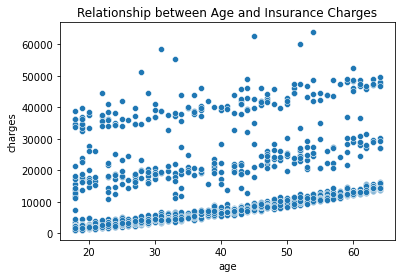

In [7]:
plt.figure()
sns.scatterplot(data=df, x = 'age', y = 'charges')
plt.title('Relationship between Age and Insurance Charges')
plt.show()
plt.close()

<div class="alert alert-block alert-info">
<b>Tip:</b> From our scatter plot, we can easily see that if you start getting older, the insurance price is getting higher.
</div>

#### 2. Our second taks is to use linear_model.LinearRegression() from sklearn, fit a model to our data, and make predictions on data.

<div class="alert alert-block alert-info">
<b>Tip:</b> As our task is asking to use only the age and charges column, we can implement the Simple Linear Regression Model.
</div>


*We first prepare our data for the linear regression model by assigning the age column to our independent variable 'X' and assigning the charges column to our dependent variable 'y'.*

*We reshape our independent variable X from 1D array to 2D array, with unknown numbers of rows (-1,..) and 1 column (..,1)*

In [8]:
X = df.age.values.reshape(-1, 1)
y = df.charges.values

In [9]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

*Let's see how our prediction is calculated by getting the Coefficient and Intercept*

In [10]:
regression.coef_

array([257.22971752])

In [11]:
regression.intercept_

3190.0217210318224

> for every unit increase in the independent variable (age), the dependent variable is expected to increase by approximately 257.72 units.

> In case of our intercept, when the age is zero, the predicted value of charges would be approximately 3165.89.

<div class="alert alert-block alert-info">
<b>Tip:</b> Getting the coefficients and intercept it's helping us to calculate the prediction using this formula:
(regression.coef_ * age) + regression.intercept_
</div>


<div class="alert alert-block alert-success">
<b>Predictions to data:</b> Let's predict charges value for age 80 (we can simply do this without using the formula with the help of Python).
</div>


In [12]:
age_prediction = regression.predict(np.array([[80]]))
print(f"Insurance charges could be: {age_prediction}")

Insurance charges could be: [23768.39912247]


*Now we visualise the prediction with a best-fit line*

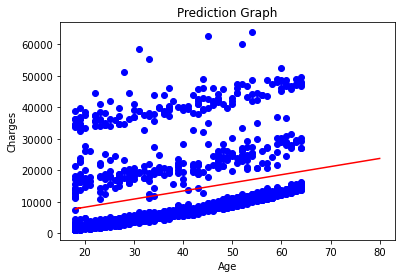

In [16]:
unknown_x = [[80]] 

x_pred = np.append(X, unknown_x).reshape(-1,1)
y_pred = regression.predict(x_pred)

plt.scatter(X, y, color = 'b')
plt.plot(x_pred, y_pred, color = 'r')
plt.title('Prediction Graph')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### 3. Our last taks is to plot another scatter plot with the best-fit line.

*Fitting our regression model*

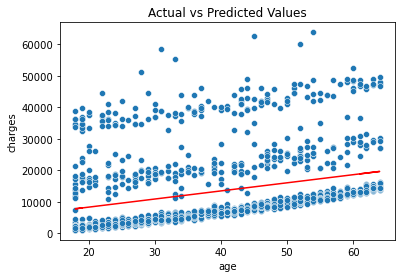

In [15]:
y_pred = regression.predict(X)
plt.figure()
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Actual vs Predicted Values')
plt.plot(X, y_pred, color = 'r')
plt.show()

<div class="alert alert-block alert-info">
<b>Tip:</b> Although our best-fit line is closer to a few points and not ignoring the majority of points from our graph, we got a weak correlation.
</div>

### Some extras to see how our model is performing

> cross-validation to evaluate the model

In [14]:
scores = cross_val_score(regression, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.10358247 0.11686431 0.06866468 0.10313665 0.04687776]


In [15]:
mean_score = np.mean(scores)  
std_score = np.std(scores) 

In [16]:
print(f"Mean cross-validation score: {mean_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_score:.2f}")

Mean cross-validation score: 0.09
Standard deviation of cross-validation scores: 0.03


<div class="alert alert-block alert-info">
<b>Tip:</b> As we got positive scores [0.10358247 0.11686431 0.06866468 0.10313665 0.04687776] indicate that the model's predictions are performing better than the baseline model. The model's performance, as measured by the cross-validation scores, is not really good, with a low average accuracy of 9% (100% the best) and a small standard deviation of 3%, indicating that the individual scores are closer to the mean, suggesting more consistent performance across the folds.
</div>


> evaluate the model accuracy using MAE = Mean Absolute Error, MSE = Mean Squared Error, R2-score = Accuracy Metric

*Let's first remember our dependent and independent variables*

In [17]:
X = df.iloc[:,:1].values.reshape(-1, 1)
y = df.loc[:,'charges'].values
y_pred = regression.predict(X)

*Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE) and R2-score*

In [18]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [19]:
print(f"Mean absolute error score: {mae:.2f}")
print(f"Mean squared error score: {mse:.2f}")
print(f"R2-score: {r2:.2f}")

Mean absolute error score: 9059.15
Mean squared error score: 133509857.08
R2-score: 0.09


<div class="alert alert-block alert-info">
<b>Tip:</b> The simple linear regression model does not appear to have a strong predictive power for estimating insurance charges based on age alone. The relatively high MAE and MSE (the smaller the better to predict) suggest that the model's predictions deviate significantly from the actual charges, and the low R2-score (we got 0.9, 1 is the best) indicates that age alone does not explain much of the variation in insurance charges.
</div>
